In [52]:
import cv2
import csv
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import ast
import groupXY_functions as util
import skimage.morphology as morphology
from skimage.morphology import opening

import path
import imutils
from tqdm import tqdm
from skimage.measure import label as sklabel

In [53]:
def scale_image_res(img, mask, dim):
    resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_NEAREST)
    resized_mask = cv2.resize(mask, dim, interpolation = cv2.INTER_NEAREST)

    return resized_img, resized_mask

In [54]:
ground_truth_df = pd.read_csv(path.ground_truth)
ground_truth_df

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0001769,0.0,0.0
1,ISIC_0001852,0.0,0.0
2,ISIC_0001871,0.0,0.0
3,ISIC_0003462,0.0,0.0
4,ISIC_0003539,0.0,0.0
...,...,...,...
145,ISIC_0015443,0.0,0.0
146,ISIC_0015445,0.0,0.0
147,ISIC_0015483,0.0,0.0
148,ISIC_0015496,0.0,0.0


In [55]:
min_pix = np.inf

for _id in ground_truth_df['image_id']:
    mask = cv2.imread(f'data/example_segmentation/{_id}_segmentation.png',0)
    
    shape = mask.shape
    pix = shape[0] * shape[1]
    if pix < min_pix:
        min_pix = pix
        mini = shape

print(mini)

(768, 1024)


(768, 1024)
(768, 1024)
(768, 1024)


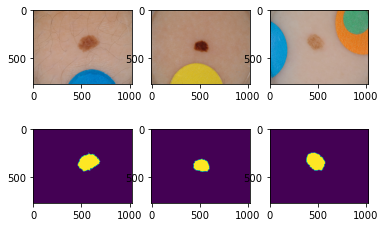

In [75]:
min_dim = (1024, 768)
n = 3

fig, ax = plt.subplots(ncols=n, nrows=2)

for i, _id in enumerate(ground_truth_df['image_id'][:n]):
    image = plt.imread(f'data/example_image/{_id}.jpg')
    mask = plt.imread(f'data/example_segmentation/{_id}_segmentation.png')
    
    image, mask = scale_image_res(image, mask, min_dim)

    ax[0,i].imshow(image)
    ax[1,i].imshow(mask)

    print(mask.shape)

In [63]:
df1 = pd.read_csv(path.out+'out.csv')
df2 = pd.read_csv(path.out+'out2.csv')

df1['sym_fix'] = df1['avg_symetry'] / df1['area']
df2['sym_fix'] = df2['avg_symetry'] / df2['area']

In [64]:
for feature in df2.columns:
    if feature != "image_id":
        print(feature)
        print(np.mean(df1[feature]-df2[feature]))
        print()

Unnamed: 0
0.0

melanoma
0.0

seborrheic_keratosis
0.0

color_lesion_r
0.0028422637644810343

color_lesion_g
0.0037809887779328677

color_lesion_b
0.004671777688862064

color_skin_r
-0.0017985153361636346

color_skin_g
-0.0012416037649175967

color_skin_b
-0.005388030624764646

area
759279982.8

perimeter
756306613.9133333

min_symmetry
163130.26

avg_symetry
460103.9408518518

sym_fix
-0.0004977052243661615



In [74]:
np.max(df1['area'])

7065240885.0